In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("covid_19_india.csv",parse_dates=["Date"],dayfirst=True)
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df=df[["Date","State/UnionTerritory","Cured","Deaths","Confirmed"]]
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [5]:
df.columns=["date","state","cured","deaths","confirmed"]
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [6]:
tn=df[df["state"]=="Tamil Nadu"]
tn.head()

,date,state,cured,deaths,confirmed
61,2020-03-07,Tamil Nadu,0,0,1
67,2020-03-08,Tamil Nadu,0,0,1
79,2020-03-09,Tamil Nadu,0,0,1
94,2020-03-10,Tamil Nadu,0,0,1
105,2020-03-11,Tamil Nadu,0,0,1


In [7]:
import datetime as dt

In [8]:
tn["date"]=tn["date"].map(dt.datetime.toordinal)
tn.head()

<ipython-input-8-e7bfec8b55d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn["date"]=tn["date"].map(dt.datetime.toordinal)


,date,state,cured,deaths,confirmed
61,737491,Tamil Nadu,0,0,1
67,737492,Tamil Nadu,0,0,1
79,737493,Tamil Nadu,0,0,1
94,737494,Tamil Nadu,0,0,1
105,737495,Tamil Nadu,0,0,1


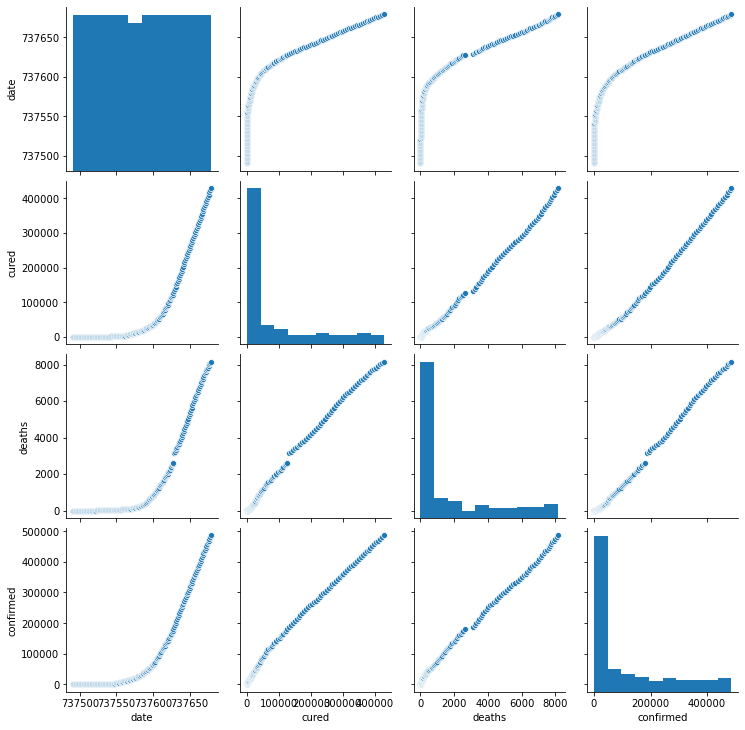

In [10]:
sns.pairplot(tn[["date","state","cured","deaths","confirmed"]])

# Now,Transform the data

In [11]:
tn["transconf"]=np.log(tn["confirmed"])
tn.head()

<ipython-input-11-2b1f4017b033>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn["transconf"]=np.log(tn["confirmed"])


,date,state,cured,deaths,confirmed,transconf
61,737491,Tamil Nadu,0,0,1,0.0
67,737492,Tamil Nadu,0,0,1,0.0
79,737493,Tamil Nadu,0,0,1,0.0
94,737494,Tamil Nadu,0,0,1,0.0
105,737495,Tamil Nadu,0,0,1,0.0


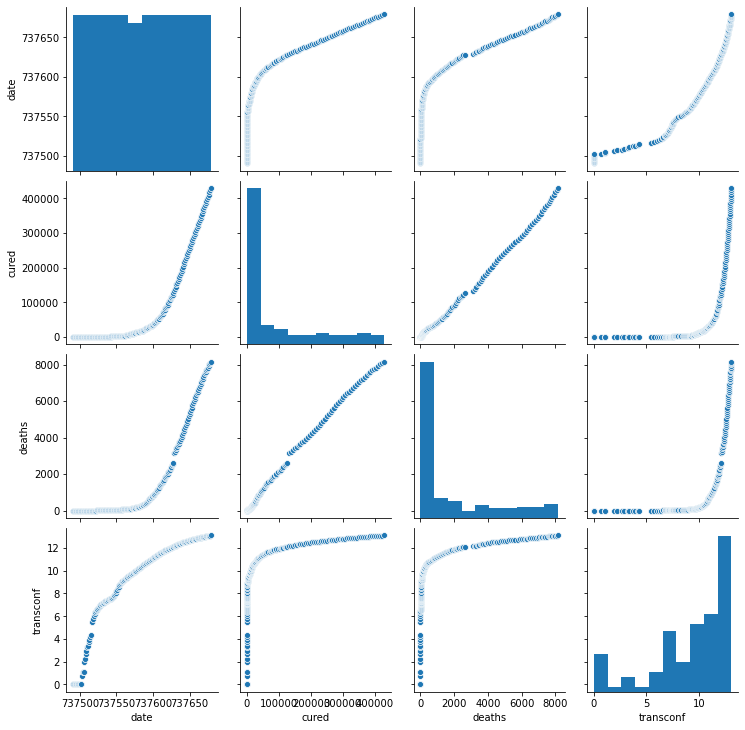

In [13]:
sns.pairplot(tn[["date","state","cured","deaths","transconf"]])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
x=tn[["date"]]
y=tn[["transconf"]]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)


In [21]:
model1=LinearRegression()

In [23]:
model1.fit(xtrain,ytrain)

LinearRegression()

In [38]:
Accuracy1=model1.score(xtrain,ytrain)
Accuracy1

0.8460096802065764

In [25]:
ypred1=model1.predict(xtest)

In [26]:
ypred1

array([[12.20305789],
       [14.98794348],
       [13.27903641],
       [ 4.86108678],
       [ 3.34205827],
       [ 8.46877948],
       [ 5.49401532],
       [11.69671505],
       [ 6.94975097],
       [11.50683649],
       [15.2411149 ],
       [ 6.50670099],
       [13.08915785],
       [ 7.39280095],
       [ 8.78524375],
       [ 8.72195089],
       [12.83598643],
       [ 5.2408439 ],
       [ 3.53193683],
       [14.67147921],
       [14.86135777],
       [ 4.29145109],
       [13.97525781],
       [10.11439369],
       [ 8.97512231],
       [ 8.0257295 ],
       [13.72208639],
       [ 7.07633668],
       [ 7.70926522],
       [ 9.92451513],
       [ 5.55730817],
       [10.05110084],
       [ 3.7218154 ],
       [ 6.44340814],
       [12.51952216],
       [ 8.53207233],
       [ 9.03841517],
       [15.05123633]])

In [27]:
ytest

,transconf
4490,12.204817
6030,13.046519
5085,12.620877
523,4.304065
61,0.000000
2371,9.782901
826,6.726233
4208,11.959974
1568,7.921898
4100,11.869186


In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [29]:
Er1=mean_squared_error(ypred1,ytest)
Er1


2.409229690402051

In [110]:
mae1=mean_absolute_error(ypred1,ytest)
mae1

1.3073996140906947

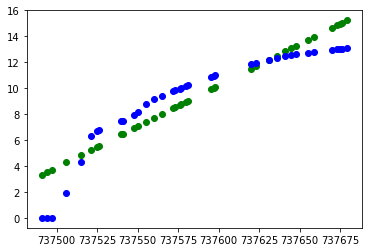

In [32]:
plt.scatter(xtest,ypred1,color="g")
plt.scatter(xtest,ytest,color="b")

In [52]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor(criterion="mae",splitter="random")

In [53]:
model2.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mae', splitter='random')

In [54]:
Accuracy2=model2.score(xtrain,ytrain)
Accuracy2

1.0

In [55]:
ypred2=model2.predict(xtest)
ypred2

array([12.17025892, 13.07094376, 12.63995999,  5.45532112,  0.        ,
        9.74578056,  6.60394382, 11.93045089,  7.8343923 , 11.90038952,
       13.08263245,  7.5416831 , 12.53948306,  8.88239171, 10.06454291,
       10.06454291, 12.45921374,  6.18414889,  0.        , 12.96697426,
       13.00774009,  2.19722458, 12.7978375 , 10.90501976, 10.10993245,
        9.37245922, 12.76469937,  8.01400499,  9.12988925, 10.90501976,
        6.60394382, 10.90501976,  0.        ,  7.42833319, 12.38830253,
        9.74578056, 10.26444332, 13.07094376])

In [56]:
Er2=mean_squared_error(ypred2,ytest)
Er2

0.04132092507558901

In [111]:
mae2=mean_absolute_error(ypred2,ytest)
mae2

0.08577952864015481

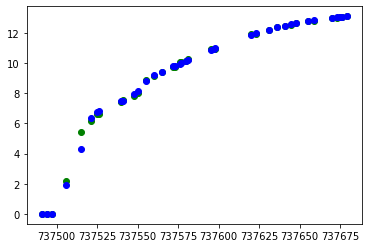

In [57]:
plt.scatter(xtest,ypred2,color="g")
plt.scatter(xtest,ytest,color="b")

In [90]:
from sklearn.svm import SVR
model3=SVR(C=100)

In [91]:
model3.fit(xtest,ytest)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100)

In [92]:
Accuracy3=model3.score(xtrain,ytrain)
Accuracy3

0.9887852139085485

In [93]:
ypred3=model3.predict(xtest)
ypred3

array([12.12557802, 13.02415573, 12.66315782,  4.25615878, -0.40725682,
        9.77967356,  5.90538744, 11.86358132,  8.18859155, 11.76874994,
       12.99388814,  7.6543094 , 12.57704325,  8.6690048 , 10.08456787,
       10.02515831, 12.45413086,  5.29901228,  0.10026402, 13.02772822,
       13.03003817,  2.4724289 , 12.91410681, 11.07750016, 10.25713675,
        9.32969714, 12.83649185,  8.32919321,  9.00098056, 10.96594918,
        6.04535838, 11.04124517,  0.65519668,  7.57025916, 12.29185686,
        9.842094  , 10.31260202, 13.01892887])

In [94]:
Er3=mean_squared_error(ypred3,ytest)
Er3

0.09344010892235899

In [107]:
mae3=mean_absolute_error(ypred3,ytest)
mae3

0.18166508616928892

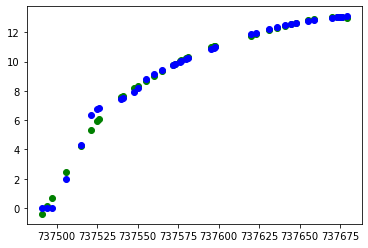

In [95]:
plt.scatter(xtest,ypred3,color="g")
plt.scatter(xtest,ytest,color="b")

In [98]:
print(Accuracy1)
print(Accuracy2)
print(Accuracy3)

0.8460096802065764
1.0
0.9887852139085485


In [100]:
print(Er1)
print(Er2)
print(Er3)

2.409229690402051
0.04132092507558901
0.09344010892235899


In [112]:
print(mae1)

1.3073996140906947


In [113]:
Res=pd.DataFrame({"Model":["Linear Regression","Desicion Tree","SVR"],"Accuracy":[Accuracy1,Accuracy2,Accuracy3],"MSE":[Er1,Er2,Er3],"MAE":[mae1,mae2,mae3]},index=[1,2,3])
Res

,Model,Accuracy,MSE,MAE
1,Linear Regression,0.846010,2.409230,1.307400
2,Desicion Tree,1.000000,0.041321,0.085780
3,SVR,0.988785,0.093440,0.181665


In [116]:
Res.to_csv("Results for Regression Models.csv",index=False)

In [117]:
Res1=pd.read_csv("Results for Regression Models.csv")
Res1

,Model,Accuracy,MSE,MAE
0,Linear Regression,0.846010,2.409230,1.307400
1,Desicion Tree,1.000000,0.041321,0.085780
2,SVR,0.988785,0.093440,0.181665
